### Importación de datos



In [16]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head(41)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
5,Guitarra acústica,Instrumentos musicales,298400.0,16100.0,10/09/2021,Beatriz Morales,Leticia,5,Tarjeta de crédito,3,-4.21528,-69.94056
6,Mochila,Deportes y diversión,105900.0,9000.0,10/06/2020,Blanca Ramirez,Bogotá,1,Cupón,1,4.60971,-74.08175
7,Tablet ABXY,Electrónicos,962600.0,49400.0,12/04/2022,Juliana Costa,Medellín,4,Nequi,1,6.25184,-75.56359
8,Olla de presión,Artículos para el hogar,82800.0,4800.0,11/04/2022,Izabela de León,Barranquilla,5,Nequi,1,10.96854,-74.78132
9,Cubo mágico 8x8,Juguetes,9100.0,3800.0,04/09/2021,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175


#1. Análisis de facturación



In [2]:
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]
nombre_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

ingresos_totales = [sum(tienda['Precio']) for tienda in lista_tiendas]

for i in range(len(nombre_tiendas)):
  print(f'{nombre_tiendas[i]} tiene un ingreso total de ${ingresos_totales[i]:,}')


Tienda 1 tiene un ingreso total de $1,150,880,400.0
Tienda 2 tiene un ingreso total de $1,116,343,500.0
Tienda 3 tiene un ingreso total de $1,098,019,600.0
Tienda 4 tiene un ingreso total de $1,038,375,700.0


# 2. Ventas por categoría

In [3]:
def contar_ventas_categoria(tienda) -> dict:
  conteos = {}
  for categoria in tienda['Categoría del Producto']:
    if categoria in conteos:
      conteos[categoria] += 1
    else:
      conteos[categoria] = 1
  return conteos

ventas_categoria = [contar_ventas_categoria(tienda) for tienda in lista_tiendas]

ventas_categoria_ordenadas = [dict(sorted(ventas_categoria[i].items())) for i in range(len(ventas_categoria))]

ventas_categoria_ordenadas_valores = [dict(sorted(ventas_categoria[i].items(), key=lambda item: item[1])) for i in range(len(ventas_categoria))]

for i in range(len(nombre_tiendas)):
  print(f'Ventas por categoría en {nombre_tiendas[i]}: {ventas_categoria_ordenadas[i]}')
for i in range(len(nombre_tiendas)):
  print(f'Ventas por categoría en {nombre_tiendas[i]}: {ventas_categoria_ordenadas_valores[i]}')

Ventas por categoría en Tienda 1: {'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Electrodomésticos': 312, 'Electrónicos': 448, 'Instrumentos musicales': 182, 'Juguetes': 324, 'Libros': 173, 'Muebles': 465}
Ventas por categoría en Tienda 2: {'Artículos para el hogar': 181, 'Deportes y diversión': 275, 'Electrodomésticos': 305, 'Electrónicos': 422, 'Instrumentos musicales': 224, 'Juguetes': 313, 'Libros': 197, 'Muebles': 442}
Ventas por categoría en Tienda 3: {'Artículos para el hogar': 177, 'Deportes y diversión': 277, 'Electrodomésticos': 278, 'Electrónicos': 451, 'Instrumentos musicales': 177, 'Juguetes': 315, 'Libros': 185, 'Muebles': 499}
Ventas por categoría en Tienda 4: {'Artículos para el hogar': 201, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Libros': 187, 'Muebles': 480}
Ventas por categoría en Tienda 1: {'Artículos para el hogar': 171, 'Libros': 173, 'Instrumentos musicales': 182,

# 3. Calificación promedio de la tienda


In [4]:
def promediar_calificacion(tienda) -> float:
  calificaciones = tienda['Calificación']
  promedio = round(sum(calificaciones) / len(calificaciones), 2)
  return promedio

promedios_calificaciones = [promediar_calificacion(tienda) for tienda in lista_tiendas]

for i in range(len(nombre_tiendas)):
  print(f'{nombre_tiendas[i]} tiene una calificación promedio de {promedios_calificaciones[i]}')

Tienda 1 tiene una calificación promedio de 3.98
Tienda 2 tiene una calificación promedio de 4.04
Tienda 3 tiene una calificación promedio de 4.05
Tienda 4 tiene una calificación promedio de 4.0


# 4. Productos más y menos vendidos

In [5]:
def contar_ventas_producto(tienda) -> dict:
  conteos = {}
  for producto in tienda['Producto']:
    if producto in conteos:
      conteos[producto] += 1
    else:
      conteos[producto] = 1
  return conteos

conteo_productos = [contar_ventas_producto(tienda) for tienda in lista_tiendas]
print(conteo_productos)

conteo_productos_ordenado = [dict(sorted(conteo_productos[i].items(), key=lambda item: item[1], reverse=True)) for i in range(len(conteo_productos))]
# print(conteo_productos_ordenado)

productos_mas_vendidos = [list(conteo_productos_ordenado[i].keys())[:5] for i in range(len(conteo_productos_ordenado))]
# print(productos_mas_vendidos)
productos_menos_vendidos = [list(conteo_productos_ordenado[i].keys())[len(conteo_productos_ordenado)-9:] for i in range(len(conteo_productos_ordenado))]

print('Productos más vendidos')
for i in range(4):
  print(f'-{nombre_tiendas[i]}: {productos_mas_vendidos[i]}')

print('Productos menos vendidos')
for i in range(4):
  print(f'-{nombre_tiendas[i]}: {productos_menos_vendidos[i]}')

[{'Asistente virtual': 40, 'Mesa de comedor': 40, 'Juego de mesa': 43, 'Microondas': 60, 'Silla de oficina': 46, 'Bloques de construcción': 56, 'Muñeca bebé': 40, 'Lavavajillas': 48, 'Lavadora de ropa': 47, 'Carrito de control remoto': 52, 'Refrigerador': 54, 'Auriculares': 50, 'Olla de presión': 35, 'Bicicleta': 54, 'Ciencia de datos con Python': 39, 'Balón de voleibol': 42, 'Ajedrez de madera': 49, 'TV LED UHD 4K': 60, 'Vaso térmico': 54, 'Kit de bancas': 44, 'Dashboards con Power BI': 42, 'Cubertería': 52, 'Set de ollas': 43, 'Batería': 53, 'Cuerda para saltar': 40, 'Estufa': 45, 'Cama box': 44, 'Impresora': 54, 'Mesa de noche': 56, 'Armario': 60, 'Dinosaurio Rex': 40, 'Guitarra eléctrica': 47, 'Secadora de ropa': 58, 'Sofá reclinable': 46, 'Tablet ABXY': 42, 'Cubo mágico 8x8': 44, 'Set de vasos': 41, 'Modelado predictivo': 51, 'Iphone 15': 49, 'Mochila': 39, 'Balón de baloncesto': 55, 'Auriculares con micrófono': 33, 'Sillón': 41, 'Guitarra acústica': 46, 'Iniciando en programación

# 5. Envío promedio por tienda

In [6]:
def promediar_envios(tienda):
  envios = tienda['Costo de envío']
  promedio = round(sum(envios) / len(envios), 2)
  return promedio
promedios_envios = [promediar_envios(tienda) for tienda in lista_tiendas]

for i in range(len(nombre_tiendas)):
  print(f'{nombre_tiendas[i]} tiene un costo de envios promedio de ${promedios_envios[i]:,}')

Tienda 1 tiene un costo de envios promedio de $26,018.61
Tienda 2 tiene un costo de envios promedio de $25,216.24
Tienda 3 tiene un costo de envios promedio de $24,805.68
Tienda 4 tiene un costo de envios promedio de $23,459.46


In [7]:
costos_envios = [tienda['Costo de envío'] for tienda in lista_tiendas]
revenue_total = []

for i in range(len(costos_envios)):
  revenue_total.append(ingresos_totales[i] - sum(costos_envios[i]))
  print(f"{nombre_tiendas[i]} genera: ${revenue_total[i]:,.0f} ingresos descontando los envíos")

Tienda 1 genera: $1,089,502,500 ingresos descontando los envíos
Tienda 2 genera: $1,056,858,400 ingresos descontando los envíos
Tienda 3 genera: $1,039,503,000 ingresos descontando los envíos
Tienda 4 genera: $983,058,300 ingresos descontando los envíos


# **Informe final**

En este proyecto se ha realizado el análisis de datos recabados de las tiendas de la cadena AluraStore.

El propósito de este análisis es determinar la tienda más recomendable para vender con base en la comparación de los datos de cada tienda. Los datos evaluados para ayudar en esta decisión fueron: ingresos, categorías más vendidad, productos más y menos vendidos y el costo de los envíos.

**Ingresos totales por tienda**

En primer lugar se observa la suma de los ingresos que genera cada tienda. Numérica y gráficamente se puede observar que la Tienda 1 es la mejor en este aspecto, mientras que la Tienda 4 es la que menos ingresos totales tiene, con una diferencia de más de 100 millones de pesos respecto a la Tienda 1.

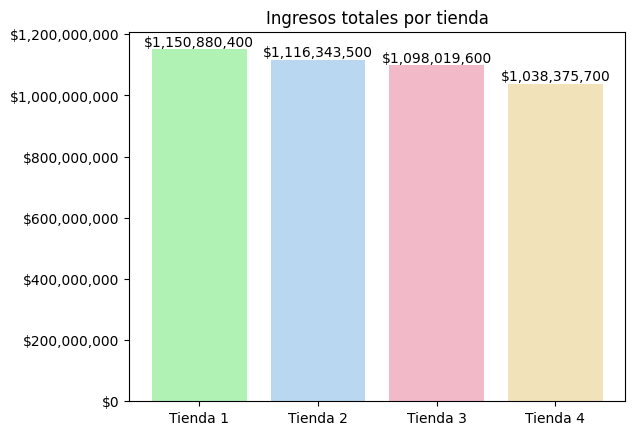

In [8]:
bar_colors = ['#B0F2B4', '#BAD7F2', '#F2BAC9', '#F2E2BA']
bars = plt.bar(nombre_tiendas, ingresos_totales, color=bar_colors)
plt.title('Ingresos totales por tienda')
ingresos_ticks = list(range(0, 1200000001, 200000000))
plt.yticks(ingresos_ticks, [f"${x:,}" for x in ingresos_ticks])
for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${int(height):,}',
            ha='center', va='bottom', fontsize=10
        )

plt.show()

**Ventas por categoría**

En el segundo análisis se comparan las ventas por categoría de cada tienda, mostrando en cantidad y en porcentaje respecto a las ventas que genera cada categoría.

En los gráficos de pastel y con los datos procesados se puede observar que la distribución de ventas por categoría es bastante similar en todas las tiendas. Por ejemplo, en las cuatro tiendas, las tres mejores categorías son muebles, electrónicos y juguetes, y las tres cayegorías con menos ventas son artículos para el hogar, libros e instrumentos musicales (presentes en todas pero en diferente orden en Tienda 3 y Tienda 4).



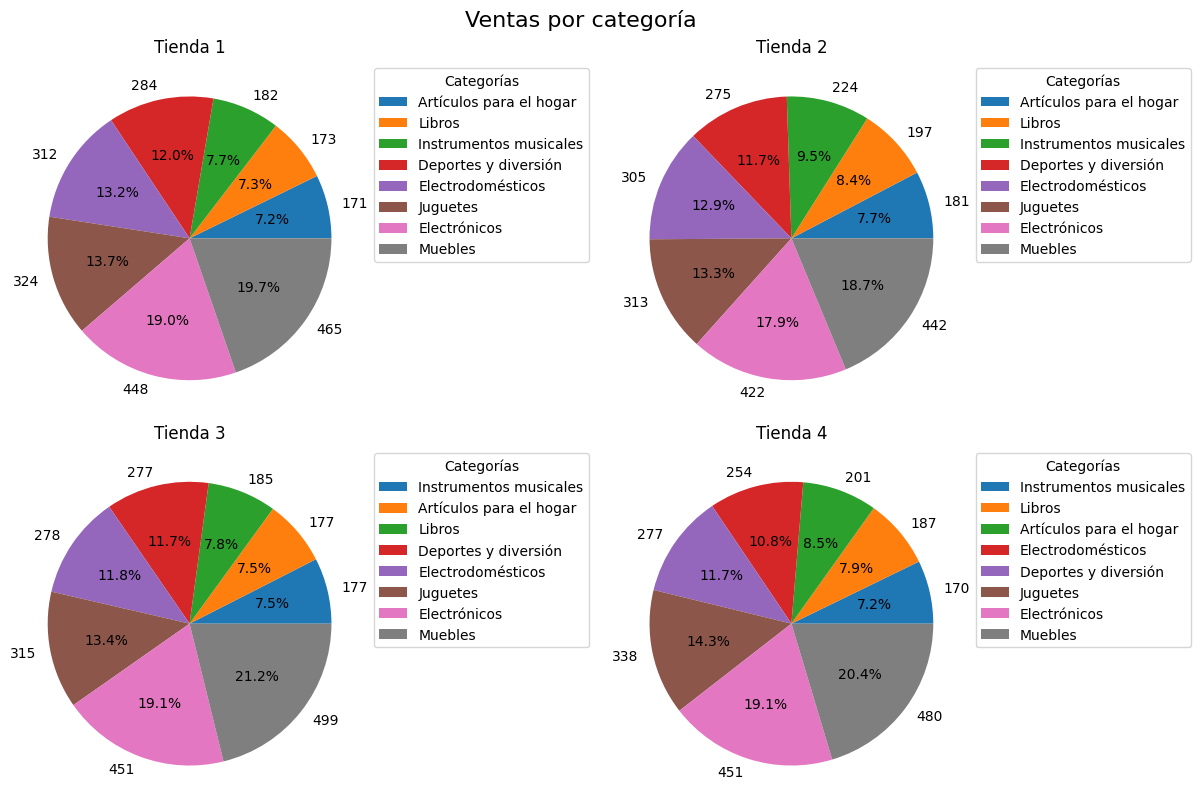

In [9]:
fig, axs = plt.subplots(2, 2, layout='constrained', figsize = [12,8])


axs_subs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]

def pie_ventas_categoria(n: int):
  axs_subs[n].pie(ventas_categoria_ordenadas_valores[n].values(), labels = ventas_categoria_ordenadas_valores[n].values(), autopct = "%.1f%%")
  axs_subs[n].set_title(nombre_tiendas[n])
  axs_subs[n].legend(labels = ventas_categoria_ordenadas_valores[n].keys(), title = "Categorías", bbox_to_anchor=(1, 0, 0.5, 1))
  # plt.show()

for i in range(len(nombre_tiendas)):
  pie_ventas_categoria(i)

fig.suptitle('Ventas por categoría', fontsize=16)
plt.show()

**Calificación promedio por tienda**

Las calificaciones se encuentran cercanas en la escala de 1 a 5. Los promedios más bajos lo tienen la Tienda 1 y Tienda 4

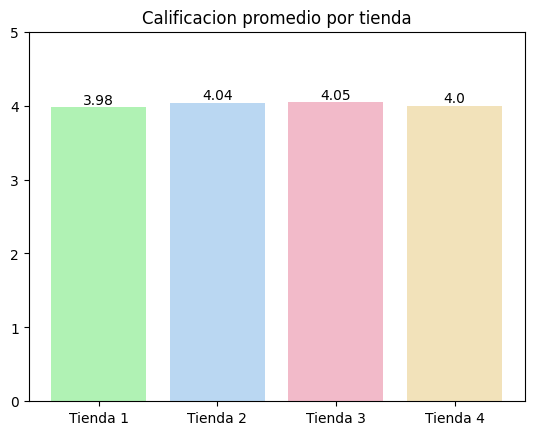

In [10]:
bars3 = plt.bar(nombre_tiendas, promedios_calificaciones, color=bar_colors)
plt.title('Calificacion promedio por tienda')
calificacion_ticks = list(range(6))
plt.yticks(calificacion_ticks, [f"{x}" for x in calificacion_ticks])

for bar in bars3:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height}',
            ha='center', va='bottom', fontsize=10
        )
plt.show()

**Productos más vendidos y menos vendidos**

Las distribuciones de los 5 productos más vendidos en cada tienda. En Tienda 1 y Tienda 3 se nota una mayor equidad en la cantidad de prodcutos vendidos, mientas que en la Tienda 2 y Tienda 4 hay más difernecias.


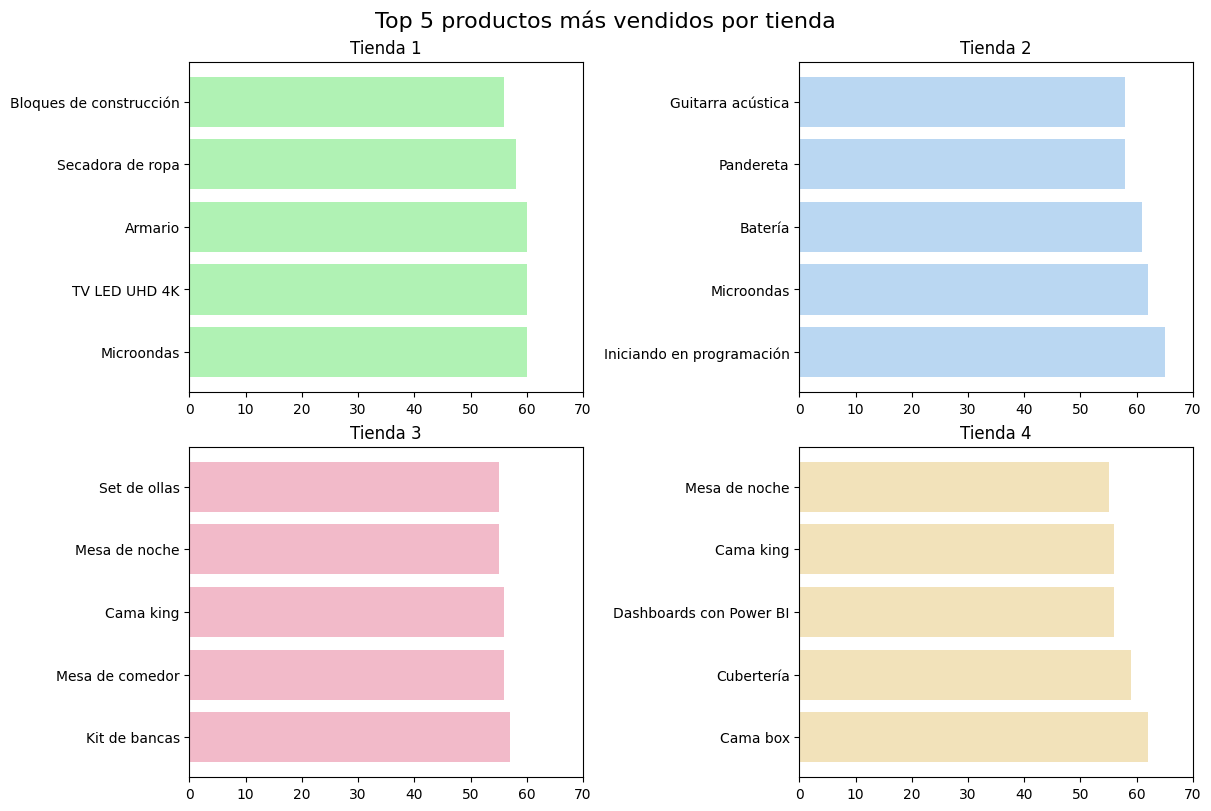

In [20]:
fig, axs = plt.subplots(2, 2, layout='constrained', figsize = [12,8])


axs_subs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]

valores_mas_vendidos = [list(conteo_productos_ordenado[i].values())[:5] for i in range(len(conteo_productos_ordenado))]
valores_menos_vendidos = [list(conteo_productos_ordenado[i].values())[len(conteo_productos_ordenado)-9:] for i in range(len(conteo_productos_ordenado))]

cantidad_hticks = list(range(0, 71, 10))

def barras_vendidos(n: int, productos: list, valores:list):
  axs_subs[n].barh(productos[n], valores[n], color = bar_colors[n])
  axs_subs[n].set_title(nombre_tiendas[n])
  axs_subs[n].set_xticks(cantidad_hticks)

for i in range(len(nombre_tiendas)):
  barras_vendidos(i, productos_mas_vendidos, valores_mas_vendidos)

fig.suptitle('Top 5 productos más vendidos por tienda', fontsize=16)
plt.show()

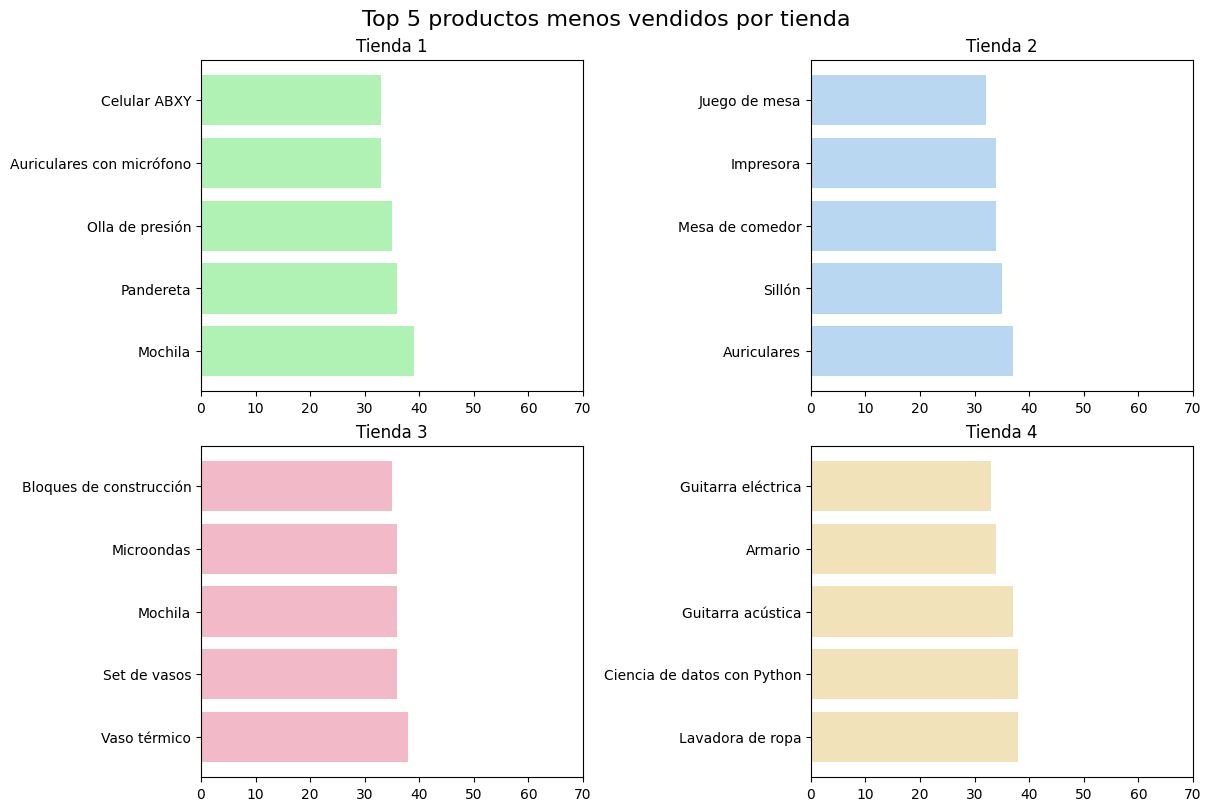

In [12]:
fig, axs = plt.subplots(2, 2, layout='constrained', figsize = [12,8])
axs_subs = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
def barras_vendidos(n: int, productos: list, valores:list):
  axs_subs[n].barh(productos[n], valores[n], color = bar_colors[n])
  axs_subs[n].set_title(nombre_tiendas[n])
  axs_subs[n].set_xticks(cantidad_hticks)


for i in range(len(nombre_tiendas)):
  barras_vendidos(i, productos_menos_vendidos, valores_menos_vendidos)

fig.suptitle('Top 5 productos menos vendidos por tienda', fontsize=16)
plt.show()

**Costo de envío promedio**

De las 4 tiendas, el menor costo de envío lo presenta la Tienda 4. Sin embargo, no es una gran cantidad si se compara con la cantidad de ingresos totales, y es una muestra de que la Tienda 4 con o sin envíos no alcanza el desempeño de las otras Tiendas.

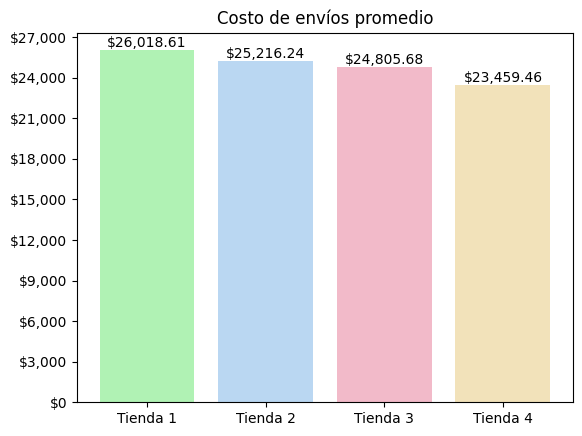

In [13]:
bars = plt.bar(nombre_tiendas, promedios_envios, color=bar_colors)
plt.title('Costo de envíos promedio')
envios_ticks = list(range(0, 27001, 3000))
plt.yticks(envios_ticks, [f"${x:,}" for x in envios_ticks])

for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${height:,}',
            ha='center', va='bottom', fontsize=10
        )

plt.show()

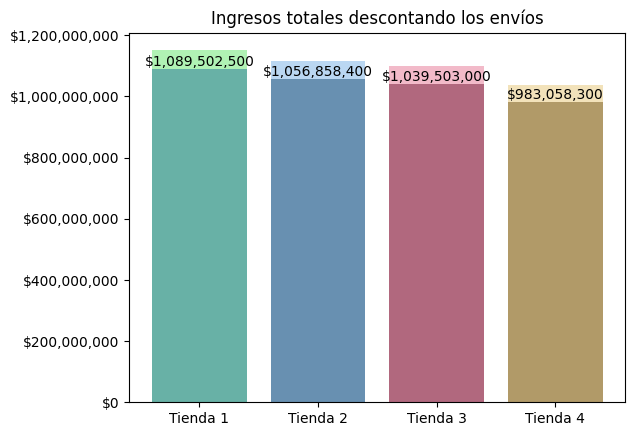

In [14]:
bar_colors2 = ['#68B1A6', '#6890B1', '#B1687E', '#B19A68']
revenue_total2 = [ingresos_totales[i]-revenue_total[i] for i in range(len(ingresos_totales))]

bars = plt.bar(nombre_tiendas, revenue_total, color=bar_colors2)
plt.bar(nombre_tiendas, revenue_total2, bottom=revenue_total, color=bar_colors)
ingresos_ticks = list(range(0, 1200000001, 200000000))
plt.yticks(ingresos_ticks, [f"${x:,}" for x in ingresos_ticks])
plt.title('Ingresos totales descontando los envíos')

for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'${int(height):,}',
            ha='center', va='bottom', fontsize=10
        )

plt.show()


**Conclusión**

En este ánalisis realizado a las cuatro Tiendas de la cadena AluraStoreLatam, se han presentado de manera ordenada y gráfica las comparaciones en ingresos, categorías y productos más y menos vendidos, calificaciones, y finalmente costo de envíos.

Con las observaciones en cada una de los grupos de datos mencionados anteriormente, se ha determinado sugerir que la Tienda 4 es la más recomendable para vender, debido a su menor desempeño total, principalmente en los infresos totales en su costo promedio de envíos, e incluso los costos totales. Además, en las categorías o productos más vendidos, no presenta una ventaja competitiva contra todas las otras tiendas, habiendo siempre una mejor o igual en desempeño.